## Підключаємо усі потрібні бібліотеки

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## Завантажуємо дані

- preg - кількість вагітностей
- plas - концентрація глюкози в плазмі через 2 години в пероральному тесті
- pres - діастолічний артеріальний тиск
- skin - товщина шкірної складки трицепса
- test - результат 2-годинного тесту на сироватковий інсулін
- mass - індекс маси тіла (вага в кг / (висота в м) ^ 2)
- pedi - функція племінного діабету (діабету в племені)
- age - вік
- class - цільовий стовпень (1: тест позитивний на діабет, 0: тест негативний на діабет)

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv', names=['preg', 'plas', 'pres', 'skin', 
                                                     'test', 'mass', 'pedi', 'age', 'class'])
# drop NaNs
df = df.dropna()
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [4]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Візуалізація

### Почнемо візуалізацію з побудови bar-графіку цільової змінної

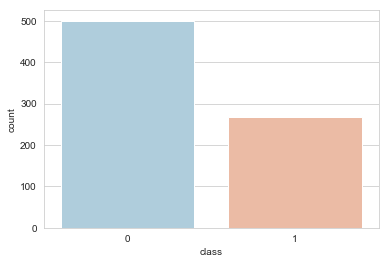

In [6]:
sb.set_style('whitegrid')
sb.countplot(x='class', data=df, palette='RdBu_r')

### Як бачимо, дані не збалансовані, тому будуть вжиті відповідні дії :)

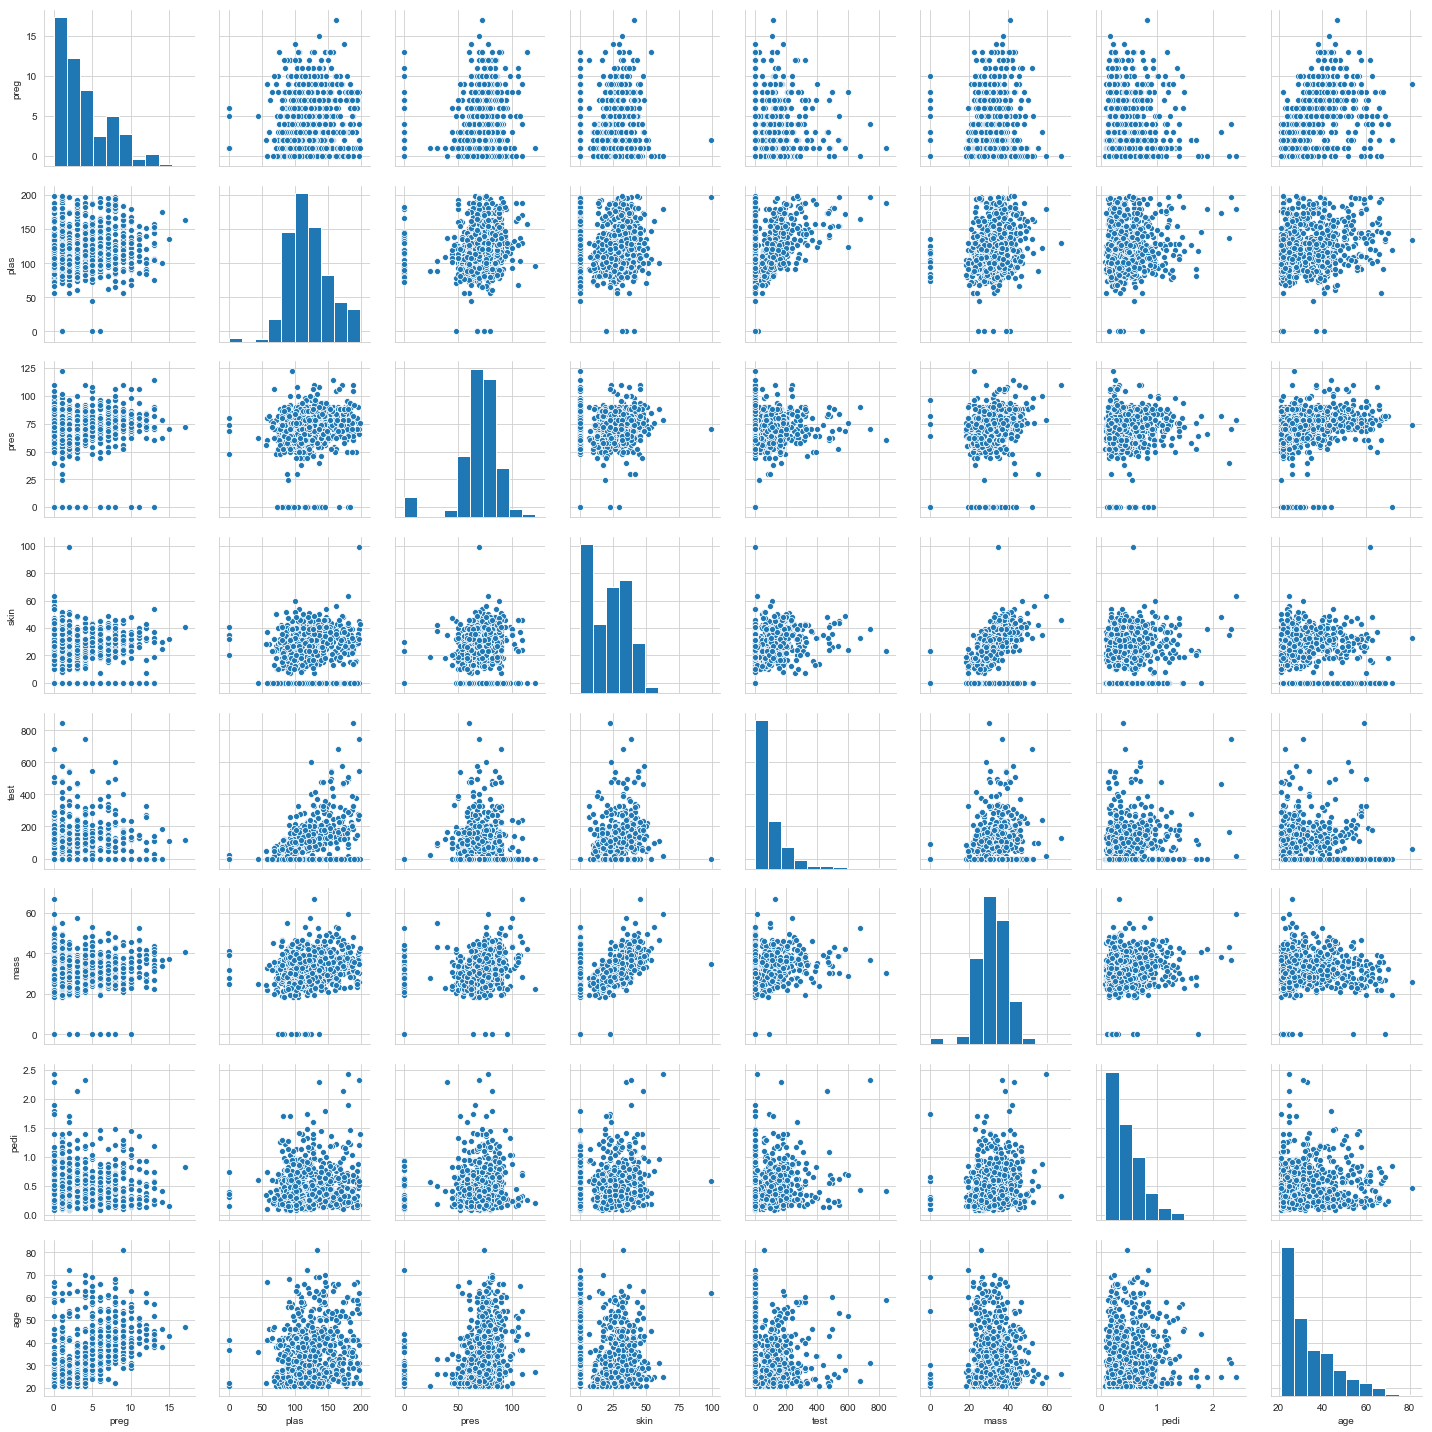

In [7]:
sb.pairplot(df.drop(['class'], axis=1))

### Побудуємо heatmap для всіх признаків

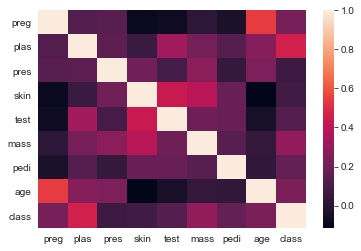

In [8]:
corr = df.corr()
sb.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#### За допомогою heatmap визначили, що з цільовим признаком найбільше корелює концентрація глюкози в плазмі

### побудуємо діаграму "ящик з вусами" для візуалізації розподілу кількості дітей відносно наявності хвороби і ні

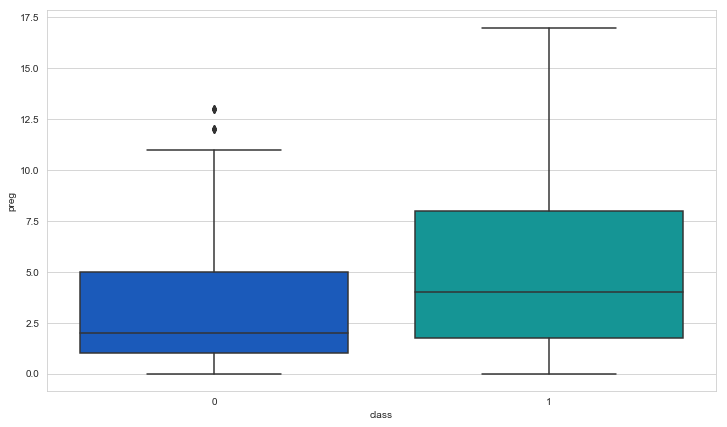

In [9]:
plt.figure(figsize=(12, 7))
sb.boxplot(x='class',y='preg',data=df,palette='winter')

#### виявлено 2 викиди!!!
#### видалимо їх

In [10]:
def f(raw):
    if raw['class'] == 0 and raw['preg'] > 11:
        pass
    else:
        return raw
    
df1 = df.apply(f, axis=1)

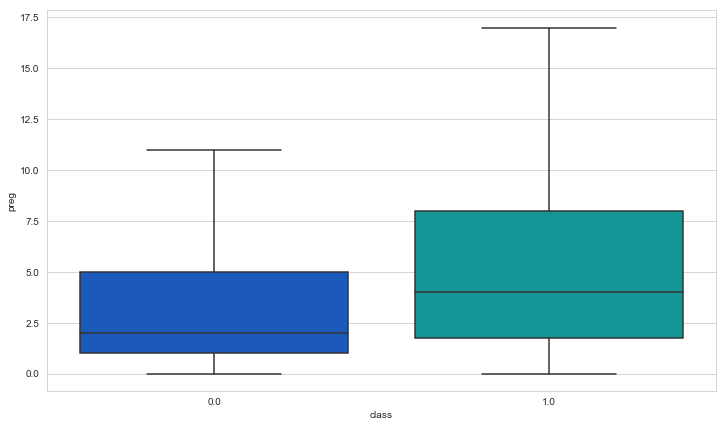

In [11]:
plt.figure(figsize=(12, 7))
sb.boxplot(x='class',y='preg',data=df1,palette='winter')

#### викидів немає :)

### Розіб'ємо дані

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('class',axis=1), 
                                                    df['class'], test_size=0.20, 
                                                    random_state=101)

## Для оцінки було одрано метрику - каппа Коена

### Першою використаємо логістичну регресію

In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression()
model_1 = lr.fit(X_train, y_train)
model_1_predictions = model_1.predict(X_test)
model_1_predictions = cross_val_predict(lr, df.drop('class', axis=1), df['class'], cv=200)
metrics.cohen_kappa_score(df['class'], model_1_predictions)

0.4635178227512392

### Наступною моделлю буде kNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
a = list(range(1,16))
neighbors = filter(lambda x: x % 2 != 0, a)
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = cross_val_predict(knn, df.drop('class', axis=1), df['class'], cv=200)
    cv_scores.append(metrics.cohen_kappa_score(df['class'], pred))

In [22]:
cv_scores

[0.29382213982417327,
 0.32469884974187124,
 0.35403419964195326,
 0.3882715099276589,
 0.3911583659764969,
 0.3816473224009709,
 0.4199576429550268,
 0.4012223789374706]

#### як бачимо, найкращий результат для 13 "сусідів"

### Наступною моделлю буде Decision tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
parameters = {'max_depth':range(3,20)}

clf = GridSearchCV(DecisionTreeClassifier(), parameters)
clf.fit(df.drop('class', axis=1), df['class'])
tree_model = clf.best_estimator_
predictions = tree_model.predict(df.drop('class', axis=1))
metrics.cohen_kappa_score(df['class'], predictions)

0.5082911838145847